In [1]:
cd C:\Users\venka\OneDrive\Desktop\Cl and Cd Pred from airfoil

C:\Users\venka\OneDrive\Desktop\Cl and Cd Pred from airfoil


# Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import scipy.io
import time
from keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D,Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import os
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
import tensorflow as tf

# Load the data

In [9]:
data = scipy.io.loadmat('1_300.mat')
data_x, data_y, rNorm = data['data_x'], data['data_y'], data['Normalization_Factor']
num_data = np.shape(data_x)[0]
train_x, train_y = data_x[:int(0.7*num_data)], data_y[:int(0.7*num_data)]
valid_x,valid_y = data_x[int(0.2*num_data):int(0.9*num_data)], data_y[int(0.2*num_data):int(0.9*num_data)]
test_x, test_y = data_x[int(0.9*num_data):], data_y[int(0.9*num_data):]

In [10]:
train_x=train_x.reshape(4798,128,128)
valid_x=valid_x.reshape(4798,128,128)
test_x=test_x.reshape(686,128,128)

In [11]:
train_x[0]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

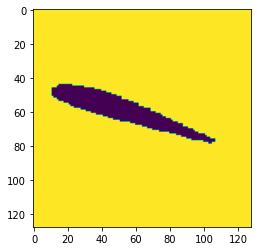

In [16]:
plt.imshow(train_x[0])

# Generating Train Data and Validation data

Increase the dimensions of the data

In [62]:
train_x=tf.expand_dims(train_x, axis=-1)
valid_x=tf.expand_dims(valid_x, axis=-1)

# Model

In [63]:
model = Sequential()

model.add(Conv2D(512, (5), activation='relu',input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (4), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))  #Dropout for regularization
model.add(Dense(128, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='tanh'))  #Sigmoid function at the end because we have just two classes

In [64]:
model.compile(loss='mse',optimizer='adam')

In [ ]:
model.fit(dumxtrain, dumytrain, 
          validation_data=(dumvaltrain,dumvaly),
          batch_size=64, 
          epochs=120, 
          shuffle = True)
#Model has been trained in the other machines with GPU accelerators, final loss was in the order of 10^-4 for the test and train 

Epoch 1/20
12/16 [=====================>........] - ETA: 9:24 - loss: 0.2676 

In [ ]:
predicted=model.predict(tf.expand_dims(test_x, axis=-1))

# Plot the data for comparision

In [ ]:
plt.scatter(test_y,preds)
plt.xlim([-0.2,0.5])
plt.ylim([-0.2,0.5])
plt.xlabel('Test data')
plt.ylabel('Predictions')

In [ ]:
plt.plot(test_y[400:500]*rNorm)
plt.plot(preds[400:500]*rNorm)
plt.legend(['Ground Truth','Predicted'])
plt.xlabel('Data')
plt.ylabel('Cl/Cd')
plt.title('Zoom in plot for Cl/Cd for the test data.')